In [1]:
# process job words and store their frequencies as dictionary
# job title visualization using wordcloud (using keras)

import pandas as pd
from tensorflow.keras.preprocessing.text import 
'''
tf.keras.preprocessing.text.text_to_word_sequence(
    input_text,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' '
)
'''

file_name = 'hidden'
data = pd.read_csv(file_name, low_memory = False)

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaeun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.tokenize import RegexpTokenizer

retokenize = RegexpTokenizer("[\w]+")
re_list = retokenize.tokenize(title_string)

In [6]:
symbol_list = set([x for x in whole_word_list if x not in re_list])   # temp_list - word_list

real_symbol_list = []
for word in symbol_list:
    if len(word) == 1:
        real_symbol_list.append(word)

print(real_symbol_list)

# real_symbol_list = ['\u200d', '®', '│', 'k', '➣', '6', '¦', 'l', 'p', '\u200b', '»', '‐', '⇒', 'ⓦ', 'b', '«', '\u202c', '1', 'á', '★', 'q', '↔', '₿', '⇉', '♦', '9', '🍃', '∙', 't', '·', '4', 'f', '◊', 'в', 'g', '🤫', '🔎', '−', '\u2028', 'ι', '3', '5', '—', 'e', 'u', 'c', '•', 'j', '\x96', '7', 'à', 'ş', '∞', '●', '✦', '–', '＆', '0', '➟', 'i', '🥷', 'r', 'n', '➢', 'o', 'ר', '►', '§', 'd', '\xa0', '\xad', "'", 'h', '✔', '\u2009', 'm', '\uf8ff', 'y', '\x03', '\u200e', '™', 'z', 'v', '◆', '♛', '8', 'w', 'и', '➲']

['z', '↔', '◆', '♦', '➣', '9', '8', '4', '0', 'q', '\u200b', 'v', '✦', '➢', '∙', '♛', '\u200d', '│', '✔', '5', '\xa0', '–', 'ר', 'j', 'e', '7', 'o', '6', '◊', '🔎', '·', 'h', '•', '¦', 'á', '−', '\u2009', '🥷', '\uf8ff', '➟', '★', 'в', "'", 'g', 'и', 'ⓦ', '＆', 'k', '►', 'y', '●', '3', 'c', '⇉', '∞', 'i', 'l', '§', '™', 'n', '«', 'f', 'd', '\u202c', '\xad', '⇒', '1', 't', '\u2028', 'p', '—', '🍃', '\x03', 'r', '🤫', 'u', '»', '➲', 'w', '®', 'ι', '\u200e', '\x96', 'à', 'ş', '‐', '₿', 'm', 'b']


In [7]:
from os import remove
from nltk.corpus import stopwords

word_list = []
stop_words = set(stopwords.words('english'))
for word in whole_word_list:
    if word not in stop_words and word not in real_symbol_list:
        word_list.append(word)

In [8]:
import collections

word_count = dict(collections.Counter(word_list))

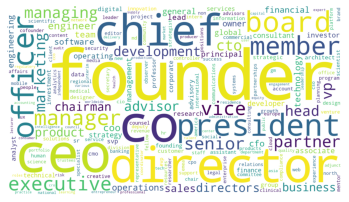

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud(width=1600, height=900, background_color="white", random_state=0)
plt.imshow(cloud.generate_from_frequencies(word_count))
plt.axis("off")
plt.show()
cloud.to_file('wordcloud_title_whole_keras.png')

In [10]:
import pickle
import operator

with open('data_dict_keras.pkl','wb') as f:
    pickle.dump(sorted(word_count.items(), key=operator.itemgetter(1), reverse=True), f)

In [11]:
print(sorted(word_count.items(), key=operator.itemgetter(1), reverse=True))

[('founder', 571142), ('ceo', 316630), ('co', 285670), ('director', 282840), ('chief', 216783), ('president', 212059), ('officer', 201942), ('board', 183515), ('member', 156419), ('manager', 119516), ('executive', 113114), ('vice', 108037), ('senior', 86384), ('partner', 80597), ('managing', 80052), ('marketing', 71809), ('cto', 69188), ('vp', 68651), ('head', 67539), ('development', 62248), ('advisor', 61988), ('product', 61362), ('directors', 58623), ('chairman', 58258), ('business', 56582), ('sales', 48190), ('engineer', 44800), ('coo', 41620), ('operations', 38209), ('team', 35679), ('cfo', 35514), ('technology', 34689), ('software', 32964), ('financial', 32271), ('owner', 30905), ('general', 30725), ('engineering', 30017), ('global', 25358), ('principal', 25055), ('lead', 24790), ('associate', 24058), ('operating', 23896), ('management', 23696), ('consultant', 22999), ('developer', 22802), ('strategy', 22631), ('investor', 21898), ('advisory', 17347), ('research', 16910), ('svp', 

In [12]:
import pickle

with open('data_dict_keras.pkl','wb') as f:
    pickle.dump(word_count,f)